In [1]:
import pandas
import numpy as np

### Create a Single-Layer Net

In [3]:
#Load Iris data set (header=None)
data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
    delim_whitespace=True,
    header=None))

In [4]:
#shape info
print(data.shape)

(150, 5)


In [5]:
# grab a slice
data[0:3,:]

array([[5.8, 2.7, 3.9, 1.2, 1. ],
       [6.9, 3.1, 5.4, 2.1, 2. ],
       [7.7, 3. , 6.1, 2.3, 2. ]])

In [6]:
np.unique(data[:,4])

array([0., 1., 2.])

In [7]:
print(np.min(data[:,0:4], axis=0))
print(np.max(data[:,0:4], axis=0))

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]


In [8]:
X = data[:,0:4]
X.shape

(150, 4)

In [9]:
# we would like our class labels to represent
# a multidimensional vector, currently the labels
# are a single scalar
## First lets grab the class labels
labels = data[:,4]

In [10]:
# will need keras/tensorflow to manip
import keras

Using TensorFlow backend.


In [11]:
# Convert the integer class labels to a
# categorical or "one-hot" encoding...
Y = keras.utils.to_categorical(labels,
len(np.unique(labels)))
# Encoded vector size?
print(Y.shape)

(150, 3)


In [12]:
# Some particular examples...
print(labels[4])
print(Y[4,:])
print(labels[8])
print(Y[8,:])
print(labels[1])
print(Y[1,:])

0.0
[1. 0. 0.]
1.0
[0. 1. 0.]
2.0
[0. 0. 1.]


In [14]:
## Setting up a single layer network
model = keras.Sequential()

In [15]:
 # Add a densely connected layer of units
# and specify the input layer size (note,
# the input layer is assumed to be there,
# which makes this a single-layer network!)
# Input size - 4
input_size = X.shape[1]
# Output size - 3
output_size = Y.shape[1]
# We are using a sigmoid activation
# function, AND the input_size was
# provided within a python list []...
model.add(keras.layers.Dense(output_size,
    activation='sigmoid',
    input_shape=[input_size]))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [19]:
# this is a template, we need to compile the net
# Prep the model for -learning
model.compile(loss=keras.losses.mse,
    optimizer=keras.optimizers.SGD(lr=0.001),
    metrics=['accuracy'])

In [20]:
# Examine the bias and connection weights...
model.get_weights()

[array([[-0.37146294,  0.8955592 , -0.7124093 ],
        [ 0.2902701 , -0.6263571 ,  0.319906  ],
        [ 0.64183605,  0.8524325 ,  0.2506107 ],
        [-0.07047641, -0.5976385 ,  0.82904005]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

### Doing the above calulations manually

In [21]:
## manual calculations for network
model.predict(X[0:5,:])

array([[0.7403586 , 0.9977852 , 0.2148393 ],
       [0.8395195 , 0.99949265, 0.30372253],
       [0.8536662 , 0.9998555 , 0.25155863],
       [0.79650813, 0.9977367 , 0.25853407],
       [0.5284946 , 0.9640642 , 0.14904599]], dtype=float32)

In [22]:
## Net Inputs - from scratch\
## Weighted-sums + bias
output_layer_neti = np.dot(np.float32(X[0:5,:]),model.get_weights()[0])+model.get_weights()[1]
output_layer_neti


array([[ 1.0478331 ,  6.1104    , -1.2959983 ],
       [ 1.6546571 ,  7.5857472 , -0.8296336 ],
       [ 1.7636497 ,  8.842005  , -1.0903169 ],
       [ 1.3646113 ,  6.088666  , -1.053602  ],
       [ 0.11410199,  3.2894237 , -1.7421032 ]], dtype=float32)

In [23]:
 ## Ouput Layer Activations - from scratch
## Logistic Sigmoid
1.0 / (1.0 + np.exp(-1.0 * output_layer_neti))

array([[0.7403586 , 0.9977852 , 0.21483925],
       [0.8395195 , 0.99949265, 0.30372256],
       [0.8536662 , 0.9998555 , 0.25155863],
       [0.79650813, 0.9977367 , 0.258534  ],
       [0.5284946 , 0.9640642 , 0.14904599]], dtype=float32)

In [24]:
## The weight matrix (from input layer to output layer)
weights = model.get_weights()[0]
## The bias weight vector (output layer)
bias_weights = model.get_weights()[1]
print(weights)
print(bias_weights)

[[-0.37146294  0.8955592  -0.7124093 ]
 [ 0.2902701  -0.6263571   0.319906  ]
 [ 0.64183605  0.8524325   0.2506107 ]
 [-0.07047641 -0.5976385   0.82904005]]
[0. 0. 0.]


In [25]:
output_neti = np.dot(np.float32(X[0:1]),weights)+bias_weights
output_neti


array([[ 1.0478331,  6.1104   , -1.2959983]], dtype=float32)

In [27]:
output_acts = 1.0 / (1.0 + np.exp(-output_neti))
output_acts

array([[0.7403586 , 0.9977852 , 0.21483925]], dtype=float32)

In [28]:
model.predict(X[0:1])

array([[0.7403586 , 0.9977852 , 0.21483925]], dtype=float32)

In [29]:
error = output_acts - np.float32(Y[0:1])
error

array([[ 0.7403586 , -0.00221479,  0.21483925]], dtype=float32)

In [30]:
deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deriv

array([[0.38445556, 0.00441968, 0.33736664]], dtype=float32)

In [32]:
## For mean-squared-error loss, the math indicates
## to normalize by 1/N where N is the number of
## output units across which we are obtaining
deltas = error*deriv*(1.0/len(bias_weights))
deltas


array([[ 9.4878331e-02, -3.2628886e-06,  2.4159867e-02]], dtype=float32)

In [33]:
w_updates = np.outer(np.float32(X[0:1]),deltas)
w_updates

array([[ 5.5029434e-01, -1.8924755e-05,  1.4012724e-01],
       [ 2.5617149e-01, -8.8097995e-06,  6.5231644e-02],
       [ 3.7002549e-01, -1.2725266e-05,  9.4223484e-02],
       [ 1.1385400e-01, -3.9154666e-06,  2.8991843e-02]], dtype=float32)

In [34]:
## Learning rate
eta = np.float32(0.001)


In [35]:
weights


array([[-0.37146294,  0.8955592 , -0.7124093 ],
       [ 0.2902701 , -0.6263571 ,  0.319906  ],
       [ 0.64183605,  0.8524325 ,  0.2506107 ],
       [-0.07047641, -0.5976385 ,  0.82904005]], dtype=float32)

In [36]:
## Weights after delta-rule update
## Subtract to minimize error (gradient descent)
weights - eta*w_updates

array([[-0.37201324,  0.8955592 , -0.71254945],
       [ 0.2900139 , -0.6263571 ,  0.31984076],
       [ 0.641466  ,  0.8524325 ,  0.25051647],
       [-0.07059027, -0.5976385 ,  0.8290111 ]], dtype=float32)

In [37]:
bias_weights

array([0., 0., 0.], dtype=float32)

In [38]:
## Bias weights after delta-rule update
## Subtract to minimize error (gradient descent)
bias_weights - eta*deltas


array([[-9.4878334e-05,  3.2628888e-09, -2.4159868e-05]], dtype=float32)

In [39]:
history = model.fit(X[0:1],Y[0:1],batch_size=1,epochs=1,verbose=0)
model.get_weights()


[array([[-0.37201324,  0.8955592 , -0.71254945],
        [ 0.2900139 , -0.6263571 ,  0.31984076],
        [ 0.641466  ,  0.8524325 ,  0.25051647],
        [-0.07059027, -0.5976385 ,  0.8290111 ]], dtype=float32),
 array([-9.4878320e-05,  3.2629519e-09, -2.4159872e-05], dtype=float32)]

### Training the model

In [40]:
 # Basic training parameters
batch_size = 16
epochs = 10
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4488 - acc: 0.3200 - val_loss: 0.4452 - val_acc: 0.3467
Epoch 2/10
75/75 [==============================] - 0s 322us/step - loss: 0.4482 - acc: 0.3200 - val_loss: 0.4446 - val_acc: 0.3467
Epoch 3/10
75/75 [==============================] - 0s 321us/step - loss: 0.4476 - acc: 0.3200 - val_loss: 0.4439 - val_acc: 0.3467
Epoch 4/10
75/75 [==============================] - 0s 372us/step - loss: 0.4469 - acc: 0.3200 - val_loss: 0.4432 - val_acc: 0.3467
Epoch 5/10
75/75 [==============================] - 0s 522us/step - loss: 0.4463 - acc: 0.3200 - val_loss: 0.4425 - val_acc: 0.3467
Epoch 6/10
75/75 [==============================] - 0s 377us/step - loss: 0.4456 - acc: 0.3200 - val_loss: 0.4418 - val_acc: 0.3467
Epoch 7/10
75/75 [==============================] - 0s 292us/step - loss: 0.4450 - acc: 0.3200 - val_loss: 0.4411 - val_acc: 0.3467
Epoch 8/10
75/75 [================

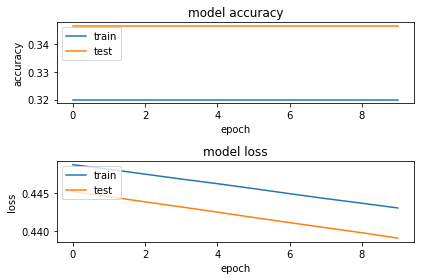

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()


In [42]:
 score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 195us/step
Test loss: 0.4408234103520711
Test accuracy: 0.33333333253860475
